# 🧠 Operation Mind Shield: Decoding Alzheimer's
####  **Full Name:** Daniel Glassey
####  **Link to SDS Profile:** https://community.superdatascience.com/u/140115de

## The assignment

  Welcome to Operation Mind Shield, data science challenge initiated by SuperDataScience focused on predicting Alzheimer's Disease based on patient data. This mission is designed for data scientists of all
  skill levels, with three different Assignments tailored to your expertise. Dive into the dataset, tackle the assignment that best matches your skills, and contribute to this collaborative project.







###  📜 Mission Brief

  In this mission, you will work with a dataset on Alzheimer's Disease patients. The goal is to build predictive models to determine the likelihood of a patient having Alzheimer's based on various features.
  You'll progress through three phases depending on the assignment level you choose:
  - Data Cleaning & Analysis
  - Data Preprocessing & Feature Selection
  - Model Selection & Fine-Tuning

### 🎯 Mission Objectives

*   Predict whether a patient has Alzheimer's based on the available features.
*   Clean and preprocess the data to improve the performance of your models.
*   Train models that best suit your experience level, from simple to highly advanced.
*   Evaluate your model's performance using appropriate validation techniques.
*   (Advanced Level Only) Deploy your model using a Streamlit App.

### 🏆 Assignments
  1. Assignment 1: The Initiate (Beginner Level)
  - Perform basic data cleaning.
  - Build a simple linear model (e.g., Logistic Regression).
  - Evaluate your model with a simple test set.

  2. **Assignment 2: The Specialist (Intermediate Level)**
  - **Conduct elaborate data cleaning with 1 feature selection step.**
  - **Train more advanced models like Gradient Boosting.**
  - **Use k-fold cross-validation for evaluation.**
  - **Perform basic hyperparameter tuning.**

  3. Assignment 3: The Operative (Advanced Level)
  - Engage in advanced data preprocessing (looping feature selection and feature extraction using PCA/LDA).
  - Build ensemble models using powerful frameworks (e.g., SageMaker, Azure Machine Learning).
  - Perform extensive hyperparameter tuning.
  - Evaluate using k-fold cross-validation.
  - Deploy your model through a Streamlit App.

## The Dataset

### Dataset Citation

**Title:** Alzheimer's Disease Dataset

**url:** https://www.kaggle.com/dsv/8668279

**DOI:** 10.34740/KAGGLE/DSV/8668279

**Publisher:** Kaggle

**Author:** Rabie El Kharoua

**Year:** 2024

### Dataset features

- **PatientID:** A unique identifier assigned to each patient (4751 to 6900).
- **Age:** The age of the patients ranges from 60 to 90 years.
- **Gender:** Gender of the patients, where 0 represents Male and 1 represents Female.
- **Ethnicity:** The ethnicity of the patients, coded as follows:
    - 0: Caucasian
    - 1: African American
    - 2: Asian
    - 3: Other
- **EducationLevel:** The education level of the patients, coded as follows:
    - 0: None
    - 1: High School
    - 2: Bachelor's
    - 3: Higher
- **BMI:** Body Mass Index of the patients, ranging from 15 to 40.
- **Smoking:** Smoking status, where 0 indicates No and 1 indicates Yes.
- **AlcoholConsumption:** Weekly alcohol consumption in units, ranging from 0 to 20.
- **PhysicalActivity:** Weekly physical activity in hours, ranging from 0 to 10.
- **DietQuality:** Diet quality score, ranging from 0 to 10.
- **SleepQuality:** Sleep quality score, ranging from 4 to 10.
- **FamilyHistoryAlzheimers:** Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
- **CardiovascularDisease:** Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
- **Diabetes:** Presence of diabetes, where 0 indicates No and 1 indicates Yes.
- **Depression:** Presence of depression, where 0 indicates No and 1 indicates Yes.
- **HeadInjury:** History of head injury, where 0 indicates No and 1 indicates Yes.
- **Hypertension:** Presence of hypertension, where 0 indicates No and 1 indicates Yes.
- **SystolicBP:** Systolic blood pressure, ranging from 90 to 180 mmHg.
- **DiastolicBP:** Diastolic blood pressure, ranging from 60 to 120 mmHg.
- **CholesterolTotal:** Total cholesterol levels, ranging from 150 to 300 mg/dL.
- **CholesterolLDL:** Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- **CholesterolHDL:** High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- **CholesterolTriglycerides:** Triglycerides levels, ranging from 50 to 400 mg/dL.
- **MMSE:** Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- **FunctionalAssessment:** Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
- **MemoryComplaints:** Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
- **BehavioralProblems:** Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
- **ADL:** Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.
- **Confusion:** Presence of confusion, where 0 indicates No and 1 indicates Yes.
- **Disorientation:** Presence of disorientation, where 0 indicates No and 1 indicates Yes.
- **PersonalityChanges:** Presence of personality changes, where 0 indicates No and 1 indicates Yes.
- **DifficultyCompletingTasks:** Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
- **Forgetfulness:** Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.
- **Diagnosis:** Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
- **DoctorInCharge:** This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

## 1. Data Preprocessing

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Global variables

In [5]:
kfold_cv = 10 # number of folds in K-Fold Cross Validation
my_random_state = 777 # set random state for models for consistent runs

### Import Data

The PatientID column and DoctorInCharge columns aren't relevant for the model

In [6]:
dataset = pd.read_csv('../../data/alzheimers_disease_data.csv') # for local jupyter notebook
# dataset = pd.read_csv('alzheimers_disease_data.csv') # for google colab
dataset = dataset.drop(['PatientID', 'DoctorInCharge'], axis= 1)

In [7]:
dataset.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


### Check for missing or duplicated data

In [8]:
# Check dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

All the columns have 2149 non-null entries, so there is no missing data

In [9]:
print(dataset[dataset.duplicated()])

Empty DataFrame
Columns: [Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness, Diagnosis]
Index: []

[0 rows x 33 columns]


There are no duplicated rows

### List all the columns

In [10]:
# columns = list(dataset.columns)
# ['Age',
#  'Gender',
#  'Ethnicity',
#  'EducationLevel',
#  'BMI',
#  'Smoking',
#  'AlcoholConsumption',
#  'PhysicalActivity',
#  'DietQuality',
#  'SleepQuality',
#  'FamilyHistoryAlzheimers',
#  'CardiovascularDisease',
#  'Diabetes',
#  'Depression',
#  'HeadInjury',
#  'Hypertension',
#  'SystolicBP',
#  'DiastolicBP',
#  'CholesterolTotal',
#  'CholesterolLDL',
#  'CholesterolHDL',
#  'CholesterolTriglycerides',
#  'MMSE',
#  'FunctionalAssessment',
#  'MemoryComplaints',
#  'BehavioralProblems',
#  'ADL',
#  'Confusion',
#  'Disorientation',
#  'PersonalityChanges',
#  'DifficultyCompletingTasks',
#  'Forgetfulness',
#  'Diagnosis']

### Rearrange the columns to group scalable and categorical and binary ones together


In order to encode the categorical data and do feature scaling it is necessary to move columns around so that ones of the same type are grouped together.

In [11]:
# 0:1
categorical_columns = ['Ethnicity', 'EducationLevel']

# 2:16
scalable_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity',\
                    'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP',\
                    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL'\
                   ]
# 17:32
binary_columns = ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',\
                  'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',\
                  'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges',\
                  'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'\
                 ]

assert len(categorical_columns) + len(scalable_columns) + len(binary_columns) == len(dataset.columns)

new_columns = categorical_columns + scalable_columns + binary_columns
dataset = dataset[new_columns]

In [12]:
dataset.tail()

,Ethnicity,EducationLevel,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,...,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
2144,0,1,61,39.121757,1.561126,4.049964,6.555306,7.535540,122,101,...,0,0,0,0,1,0,0,0,0,1
2145,0,2,75,17.857903,18.767261,1.360667,2.904662,8.555256,152,106,...,0,0,0,1,0,0,0,0,0,1
2146,0,1,77,15.476479,4.594670,9.886002,8.120025,5.769464,115,118,...,0,0,0,0,0,0,0,0,0,1
2147,3,1,78,15.299911,8.674505,6.354282,1.263427,8.322874,103,96,...,0,0,0,0,0,0,0,0,1,1
2148,0,2,72,33.289738,7.890703,6.570993,7.941404,9.878711,166,78,...,0,0,0,1,0,1,0,0,1,0


### Find least correlated feature

In [13]:
correlation_matrix = dataset.corr()
target_correlation = correlation_matrix['Diagnosis'].sort_values(ascending=False, key=abs)
print(target_correlation)

Diagnosis                    1.000000
FunctionalAssessment        -0.364898
ADL                         -0.332346
MemoryComplaints             0.306742
MMSE                        -0.237126
BehavioralProblems           0.224350
SleepQuality                -0.056548
EducationLevel              -0.043966
CholesterolHDL               0.042584
Hypertension                 0.035080
FamilyHistoryAlzheimers     -0.032900
CholesterolLDL              -0.031976
Diabetes                    -0.031508
CardiovascularDisease        0.031490
BMI                          0.026343
Disorientation              -0.024648
CholesterolTriglycerides     0.022672
HeadInjury                  -0.021411
Gender                      -0.020975
PersonalityChanges          -0.020627
Confusion                   -0.019186
SystolicBP                  -0.015615
Ethnicity                   -0.014782
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
AlcoholConsumption          -0.007618
CholesterolT

Forgetfullness is the least correlated so drop it from the dataset

FunctionalAssessment, ADL, MemoryComplaints, MMSE and BehavioralProblems are the most significantly correlated, abs more than 0.1. After I choose which gradient boost model to use I will see if similar results can be achieved with just these 5 features.

In [14]:
dataset = dataset.drop(columns = 'Forgetfulness')

# 2:16
compact_columns = ['FunctionalAssessment', 'ADL', 'MMSE',\
                    'MemoryComplaints', 'BehavioralProblems', 'Diagnosis'\
                   ]

### Extract X and y

In [15]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1] )], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting the dataset into the Training set and Test set

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = my_random_state)

In [18]:
X_train[0]

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.30000000e+01, 1.74676264e+01, 8.13146340e+00, 7.85111769e+00,
       5.05164538e+00, 5.20053085e+00, 1.78000000e+02, 8.60000000e+01,
       1.65851535e+02, 9.87366340e+01, 8.67446971e+01, 8.30059434e+01,
       1.36895662e-01, 1.73499449e+00, 3.80938560e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00])

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 8:23] = sc.fit_transform(X_train[:, 8:23])
X_test[:, 8:23] = sc.transform(X_test[:, 8:23])

In [20]:
X_train[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.91275857, -1.42309454,
       -0.31610573,  1.0215275 ,  0.0301173 , -1.08342802,  1.69728962,
       -0.21906004, -1.40507096, -0.59317052,  1.17371098, -1.41485164,
       -1.69155204, -1.18068686, -0.39175117,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ])

## 2. Gradient Boosting models

### Initialise result variables

In [21]:
gb_confusion_matrices = [] # confusion matrices
gb_accuracies = [] # k-fold accuracies
gb_one_accuracy = [] # accuracy on test set
gb_models = ["CatBoost",\
             "XGBoost",\
             "LightGBM"\
            ]


### CatBoost

#### Building and training the model

##### Building the model

In [22]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [23]:
import catboost as cb
model = cb.CatBoostClassifier(verbose = 0, random_state = my_random_state)
#model = cb.CatBoostClassifier(verbose=0, task_type='GPU', random_state = my_random_state) # colab with GPU

##### Training the model

In [24]:
model.fit(X_train, y_train)

#### Inference

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,

#### Evaluating the model

##### Making the Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
gb_confusion_matrices.append(cm)

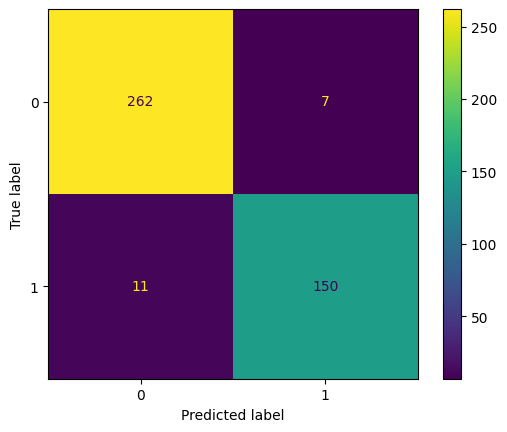

In [28]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

##### Accuracy of 0 model

In [29]:
monkey = 100*sum(cm[0])/cm.sum()
print("Accuracy of 0 model: {:.1f}%".format(monkey))

Accuracy of 0 model: 62.6%


##### Accuracy

In [30]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy on test set: {:.2f}%".format(acc*100))
gb_one_accuracy.append(acc)

Accuracy on test set: 95.81%


##### k-Fold Cross Validation and Stratified

In [31]:
from sklearn.model_selection import cross_val_score
kf_accs = cross_val_score(estimator=model,X=X_train, y=y_train, cv=kfold_cv)
gb_accuracies.append(kf_accs)

###### Output

In [32]:
print("K-Fold Accuracy: {:.2f} %".format(kf_accs.mean()*100))
print("Standard Deviation: {:.2f} %".format(kf_accs.std()*100))
print(kf_accs)

K-Fold Accuracy: 95.29 %
Standard Deviation: 1.57 %
[0.95348837 0.91860465 0.94186047 0.94767442 0.97674419 0.97093023
 0.94767442 0.96511628 0.94767442 0.95906433]


### XGBoost

#### Building and Training the model

##### Building the model

In [33]:
from xgboost import XGBClassifier
model = XGBClassifier()

##### Training the model

In [34]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Inference

In [35]:
y_pred = model.predict(X_test)

#### Evaluating the model

##### Making the Confusion Matrix

In [36]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
gb_confusion_matrices.append(cm)

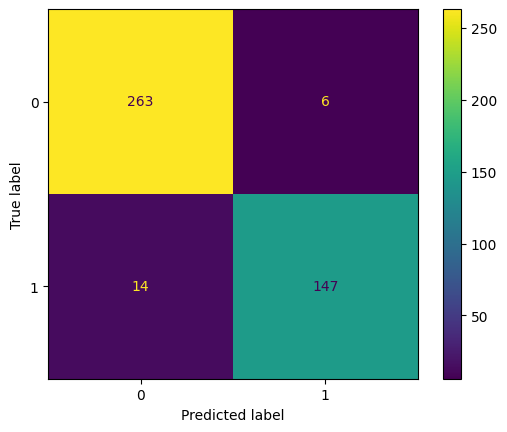

In [37]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

##### Accuracy of 0 model

In [38]:
monkey = 100*sum(cm[0])/cm.sum()
print("Accuracy of 0 model: {:.1f}%".format(monkey))

Accuracy of 0 model: 62.6%


##### Accuracy

In [39]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy on test set: {:.2f}%".format(acc*100))
gb_one_accuracy.append(acc)

Accuracy on test set: 95.35%


##### k-Fold Cross Validation and Stratified

In [40]:
kf_accs = cross_val_score(estimator=model,X=X_train, y=y_train, cv=kfold_cv)
gb_accuracies.append(kf_accs)

###### Output

In [41]:
print("K-Fold Accuracy: {:.2f} %".format(kf_accs.mean()*100))
print("Standard Deviation: {:.2f} %".format(kf_accs.std()*100))
print(kf_accs)

K-Fold Accuracy: 94.65 %
Standard Deviation: 2.08 %
[0.93023256 0.89534884 0.94186047 0.94767442 0.97674419 0.95930233
 0.94767442 0.95930233 0.94767442 0.95906433]


### LightGBM

#### Building and Training the model

##### Building the model

In [42]:
import lightgbm
model = lightgbm.LGBMClassifier(verbose=0, learning_rate=0.08, n_estimators=110, num_leaves=29, random_state = my_random_state )

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


##### Training the model

In [43]:
model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.08, n_estimators=110, num_leaves=29,
               random_state=777, verbose=0)

#### Inference

In [44]:
y_pred = model.predict(X_test)

#### Evaluating the model

##### Making the Confusion Matrix

In [45]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
gb_confusion_matrices.append(cm)
gb_one_accuracy.append(accuracy_score(y_test, y_pred))

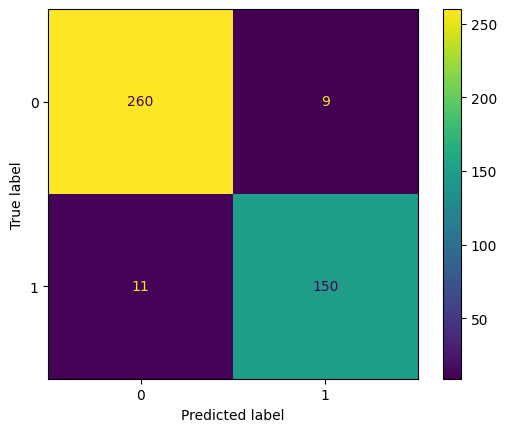

In [46]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

##### Accuracy of 0 model

In [47]:
monkey = 100*sum(cm[0])/cm.sum()
print("Accuracy of 0 model: {:.1f}%".format(monkey))

Accuracy of 0 model: 62.6%


##### Accuracy

In [48]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy on test set: {:.2f}%".format(acc*100))
gb_one_accuracy.append(acc)

Accuracy on test set: 95.35%


##### k-Fold Cross Validation and Stratified

In [49]:
kf_accs = cross_val_score(estimator=model,X=X_train, y=y_train, cv=kfold_cv)
gb_accuracies.append(kf_accs)

###### Output

In [50]:
print("K-Fold Accuracy: {:.2f} %".format(kf_accs.mean()*100))
print("Standard Deviation: {:.2f} %".format(kf_accs.std()*100))
print(kf_accs)

K-Fold Accuracy: 94.82 %
Standard Deviation: 1.90 %
[0.94186047 0.90697674 0.94186047 0.94186047 0.98255814 0.97093023
 0.94767442 0.95348837 0.94186047 0.95321637]


## 3. Comparing Gradient Boosting models

### Confusion Matrices

In [51]:
print("Confusion Matrices\n")
for i in range(len(gb_models)):
  print(gb_models[i])
  print(gb_confusion_matrices[i])

Confusion Matrices

CatBoost
[[262   7]
 [ 11 150]]
XGBoost
[[263   6]
 [ 14 147]]
LightGBM
[[260   9]
 [ 11 150]]


### Test Set Accuracy scores

In [52]:
print("Accuracy Scores\n")
for i in range(len(gb_models)):
  print(gb_models[i].ljust(25), "{:.2f}%".format(gb_one_accuracy[i]*100))

Accuracy Scores

CatBoost                  95.81%
XGBoost                   95.35%
LightGBM                  95.35%


### K-Fold Validation Accuracies

In [53]:
print("K-Fold Validation\n")
for i in range(len(gb_models)):
  print(gb_models[i].ljust(25), "Accuracy: {:.2f}% Standard Deviation: {:.2f}%".format(gb_accuracies[i].mean()*100, gb_accuracies[i].std()*100))

K-Fold Validation

CatBoost                  Accuracy: 95.29% Standard Deviation: 1.57%
XGBoost                   Accuracy: 94.65% Standard Deviation: 2.08%
LightGBM                  Accuracy: 94.82% Standard Deviation: 1.90%


**CatBoost gives the highest accuracy so do grid search using CatBoost to find best parameters**

## 4. Test with compact 5 feature dataset

### Initialise compact dataset

In [54]:
compact_df = dataset[compact_columns]
compact_df.head()

,FunctionalAssessment,ADL,MMSE,MemoryComplaints,BehavioralProblems,Diagnosis
0,6.518877,1.725883,21.463532,0,0,0
1,7.118696,2.592424,20.613267,0,0,0
2,5.895077,7.119548,7.356249,0,0,0
3,8.965106,6.481226,13.991127,0,1,0
4,6.045039,0.014691,13.517609,0,0,0


### Extract Xc and Yc

In [55]:
#Extract Xc and Yc
Xc = compact_df.iloc[:,:-1].values
yc = compact_df.iloc[:, -1].values

### Get training and test sets

In [56]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state = my_random_state)
# With Feature scaling
sc_compact = StandardScaler()
Xc_train[:, 0:3] = sc_compact.fit_transform(Xc_train[:, 0:3])
Xc_test[:, 0:3] = sc_compact.transform(Xc_test[:, 0:3])
# Xc_train
# Xc_train = sc_compact.fit_transform(Xc_train)
# Xc_test = sc_compact.transform(Xc_test)
Xc_train

array([[-1.18068686, -0.39175117, -1.69155204,  0.        ,  1.        ],
       [ 1.29726256,  0.70248361, -0.01016152,  0.        ,  0.        ],
       [-1.43987674,  0.25734477,  1.08093767,  0.        ,  0.        ],
       ...,
       [ 1.66165346,  0.51379755, -0.4723082 ,  0.        ,  0.        ],
       [-0.86361253, -1.52810515, -0.64071635,  0.        ,  1.        ],
       [ 0.47016968,  1.25678085,  1.62282808,  1.        ,  0.        ]])

### Create, fit and predict model

In [57]:
import catboost as cb
model = cb.CatBoostClassifier(verbose = 0, random_state = my_random_state)
model.fit(Xc_train, yc_train)
yc_pred = model.predict(Xc_test)

### Confusion Matrix

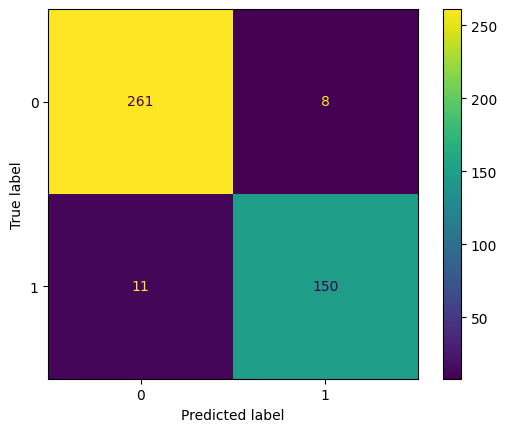

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=yc_test, y_pred=yc_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

### Test set accuracy

In [59]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true=yc_test, y_pred=yc_pred)
print("Accuracy on test set: {:.2f}%".format(acc*100))

Accuracy on test set: 95.58%


### K-fold cross validation

In [60]:
from sklearn.model_selection import cross_val_score
kf_accs = cross_val_score(estimator=model,X=Xc_train, y=yc_train, cv=kfold_cv)

In [61]:
print("K-Fold Accuracy: {:.2f} %".format(kf_accs.mean()*100))
print("Standard Deviation: {:.2f} %".format(kf_accs.std()*100))
print(kf_accs)

K-Fold Accuracy: 95.23 %
Standard Deviation: 1.76 %
[0.95348837 0.9127907  0.94186047 0.94767442 0.97674419 0.97674419
 0.94767442 0.95348837 0.94767442 0.96491228]


## 5. Grid Search - optimise chosen model hyperparameters

In [ ]:
# Tune the CatBoost model with the following hyperparameters. The hyperparameters that have the greatest effect on optimizing the CatBoost evaluation metrics are: learning_rate, depth, l2_leaf_reg, and random_strength. For a list of all the CatBoost hyperparameters, see CatBoost hyperparameters.

# Parameter Name	Parameter Type	Recommended Ranges
# learning_rate	ContinuousParameterRanges	MinValue: 0.01, MaxValue: 0.1
# depth	IntegerParameterRanges	MinValue: 4, MaxValue: 10
# l2_leaf_reg	IntegerParameterRanges	MinValue: 2, MaxValue: 10
# random_strength	ContinuousParameterRanges	MinValue: 0, MaxValue: 10


In [ ]:
import catboost as cb
from sklearn.model_selection import GridSearchCV
model = cb.CatBoostClassifier(verbose = 0, random_state = my_random_state)
model.fit(Xc_train, yc_train)
parameters = [{'learning_rate' : [0.04, 0.05, 0.06],\
               'depth' : [8, 9],
               'l2_leaf_reg' : [2, 4],
               'random_strength' : [0, 0.5]}]

# parameters = [{'learning_rate' : [0.006, 0.007, 0.008, 0.009], # initially 0.01, 0.03
#                'depth' : [8, 9, 10], # initially 4, 10
#                'l2_leaf_reg' : [2, 3], # initially 2,6
#                'random_strength' : [0, 0.5]}] # initially 0,4
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = kfold_cv,
                           n_jobs = -1)

In [ ]:
# The long bit
grid_search.fit(Xc_train, yc_train)

In [ ]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 95.80%

Best Parameters: {'depth': 10, 'l2_leaf_reg': 2, 'learning_rate': 0.01, 'random_strength': 0}

### Rerun test set accuracy

With best parameters from grid search

In [68]:
best_parameters = {'depth': 10, 'l2_leaf_reg': 2, 'learning_rate': 0.01, 'random_strength': 0}

In [69]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=kfold_cv, shuffle = True, random_state=my_random_state)

model = cb.CatBoostClassifier(l2_leaf_reg = best_parameters['l2_leaf_reg'], \
                             learning_rate = best_parameters['learning_rate'], \
                             depth = best_parameters['depth'], \
                             random_strength = best_parameters['random_strength'],\
                             random_state = my_random_state,\
                             verbose=0)
model.fit(Xc_train, yc_train)
yc_pred = model.predict(Xc_test)
accuracy = accuracy_score(yc_test, yc_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
# accs = cross_val_score(estimator = model, X = X, y = y, cv=kfold_cv, scoring='accuracy')
accs = cross_val_score(estimator = model,
                             X = Xc,
                             y = yc,
                             scoring = 'accuracy',
                             cv = skf)
print("Mean Accuracy: {:.2f}%".format(accs.mean()*100))
print("Standard Deviation: {:.2f}%".format(accs.std()*100))

Accuracy: 95.81%
Mean Accuracy: 95.30%
Standard Deviation: 1.09%


In [70]:
print(accs)

[0.96744186 0.94418605 0.95348837 0.96744186 0.95813953 0.96744186
 0.93953488 0.94883721 0.93953488 0.94392523]
